# Predict expected time of delivery(dlvry_time)
**dlvry_time = time of order ---> time of delivery**

## Read data

In [1]:
DATA_READ_PATH = '/Users/calvinperumalla/personal project/Master - Data Scientist, ML Project 6'
import os

In [2]:
# load feature description --- sliced and diced data description wrote out pandas df loadable csv 
import pandas as pd
feature_description = pd.read_csv(os.path.join(DATA_READ_PATH, 'feature_description.csv'))[['feature', 'description']].drop_duplicates(subset='feature').to_dict()
index = list(feature_description['description'].keys())
feature_description = {feature_description['feature'][i]:feature_description['description'][i] for i in index}

In [3]:
# read data 
train_data = pd.read_csv(os.path.join(DATA_READ_PATH,'historical_data.csv'))

In [4]:
#train_data.dtypes
display(train_data)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
# easy look up of description of feature
feature_description['total_outstanding_orders']

' Number of orders within 10 miles of this order that are currently being processed.'

In [4]:
# create a column of what we want to actually predict: the time taken to from the time of placing the order,
# to a dasher picking it up (pick_up_time): 
# Total_delivery_time = estimated_order_place_duration (Known) + pick_up_time + estimated_store_to_consumer_driving_duration(Known)

from datetime import datetime
train_data['pick_up_time'] = (pd.to_datetime(train_data['actual_delivery_time']) - pd.to_datetime(train_data['created_at']))
train_data['pick_up_time'] = train_data['pick_up_time'].apply(lambda x: x.total_seconds()) - train_data['estimated_order_place_duration'] - train_data['estimated_store_to_consumer_driving_duration']

## Feature Engineering

**use statistical tests to determine best features**

In [7]:
# to remove noise
import numpy as np
from tqdm import tqdm
def filter_noise(df, features, noise_threshold=99):
    tmp_df = None
    for f in tqdm(features):
        if tmp_df is None:
            tmp_df = df
        upper = np.percentile(tmp_df[f], noise_threshold)
        tmp_df = tmp_df[tmp_df[f]< upper]
    return tmp_df

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
try:
    before = len(train_data)
    train_data_dropna = train_data.dropna()
    after_na = len(train_data_dropna)
    train_data_dropna.drop(['actual_delivery_time', 'created_at', 'store_primary_category'], axis=1, inplace=True)
    #train_data_filter = filter_noise(train_data_dropna, train_data_dropna.columns)
    train_data_filter = filter_noise(train_data_dropna, ['pick_up_time'])
    after = len(train_data_filter)
    print('original data set size: {} instances \nafter dropping rows with nan: {}, \nafter removing noise: {} instances'.format(before, after_na, after))
except ValueError:
    raise(e)
    pass

features = train_data_filter.drop(['pick_up_time'], axis=1)
labels = train_data_filter['pick_up_time']

# NOTE: tried with f_regression and got results that were not better than previous results
X_new = SelectKBest(f_regression, k=7).fit_transform(features, labels.astype(int))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|██████████| 1/1 [00:00<00:00, 98.69it/s]

original data set size: 197428 instances 
after dropping rows with nan: 175777, 
after removing noise: 174018 instances



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


## Approach 4: Model Building and Validation 
1. Features: calculated by f regression score 
2. Classifier: non linear regression model - SVR
3. Validation: 4 fold validation
4. Metric: R2 score

Trying out the SVR method on a small data set to test the method

In [9]:
from sklearn.model_selection import KFold

from sklearn.svm import SVR
clf = SVR(kernel='poly', degree=2, epsilon=120, verbose=True)

small_data = train_data_filter.sample(10000) 
#small_data = train_data_filter
features = small_data.drop(['pick_up_time'], axis=1)
labels = small_data['pick_up_time']

# NOTE: tried with f_regression and got results that were not better than previous results
small_X_new = SelectKBest(f_regression, k=7).fit_transform(features, labels.astype(int))

y = labels.astype(int)
print('done')

done


In [ ]:
model_predictions = {}
model_performance = {}
model_run_index = 0
# get train set
train_x = small_X_new[:7000]
train_y = y.iloc[:7000]
# get test set 
test_x = small_X_new[7000:]
test_y = y.iloc[7000:]
print('train set size: {}'.format(len(train_x)))
print('test set size: {}'.format(len(test_x)))
#print(any([any(np.isnan(inst)) for inst in train_x]))
#print(any([np.isnan(inst) for inst in train_y]), 'y')
model = clf.fit(train_x, train_y)
predictions = model.predict(test_x)
model_name = 'run_{}'.format(model_run_index)
model_predictions[model_name] = zip(test_y.values, predictions)
model_performance[model_name] = model.score(test_x, test_y)

train set size: 7000
test set size: 3000
[LibSVM]

In [ ]:
model_performance

#### Train support vector regression model

Going to use a SVR with a poly kernal. 
To speed things up we want to use a kernal estimator that estimates a feature map of kernal values 
This is passed on to sklearn.svm.LinearSVR and we compute a model

In [110]:
# SVM
# error tolerance in seconds
params = {
'epsilon': 120, # 2 minutes
    # regularization param
    'C':1.0, # leaving default
    # optimization type
    'dual': False
}

kernal_approx_params = {
    'kernal': 'poly',
    'n_components': 300,
}

In [ ]:
from sklearn.kernel_approximation import Nystroem

In [107]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=5)
model_predictions = {}
model_performance = {}
model_run_index = 0
y = labels.astype(int)
for train_index, test_index in tqdm(kfold.split(X_new)):
    model_run_index += 1
    regressor = LinearRegression()
    train_x = X_new[train_index]
    train_y = y.iloc[train_index]
    #print(any([any(np.isnan(inst)) for inst in train_x]))
    #print(any([np.isnan(inst) for inst in train_y]), 'y')
    model = regressor.fit(train_x, train_y)
    test_x = X_new[test_index]
    test_y = y.iloc[test_index]
    predictions = model.predict(test_x)
    model_name = 'run_{}'.format(model_run_index)
    model_predictions[model_name] = zip(test_y.values, predictions)
    model_performance[model_name] = model.score(test_x, test_y)

5it [00:00, 21.46it/s]


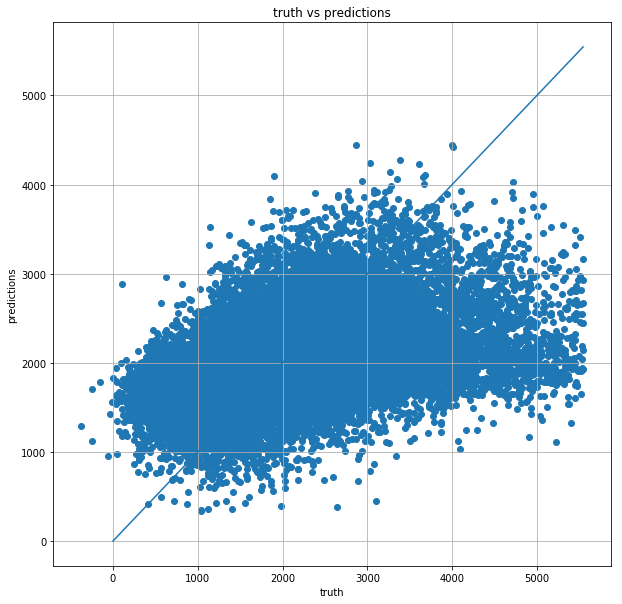

In [109]:
from matplotlib import pyplot as plt
true, pred = zip(*model_predictions['run_1'])
mx = int(max(max(true), max(pred)))
plt.figure(figsize=(10, 10))
plt.plot(list(range(mx)), list(range(mx)))
plt.scatter(true, pred)
plt.title('truth vs predictions')
plt.xlabel('truth')
plt.ylabel('predictions')
plt.grid()
plt.show()